In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from google.colab import drive

df=pd.read_csv(r'https://raw.githubusercontent.com/samarth1107/Anti-fungal_Peptide/master/train.csv')
df2=pd.read_csv(r'https://raw.githubusercontent.com/samarth1107/Anti-fungal_Peptide/master/test.csv') 
df=df.rename(columns={"Lable":"Label"})
pd.set_option('display.max_rows', 1000000)
df.at[1481,'Label']=1


Train_seq=pd.read_csv(r'https://raw.githubusercontent.com/samarth1107/Anti-fungal_Peptide/master/Train_seq.csv')
Test_seq=pd.read_csv(r'https://raw.githubusercontent.com/samarth1107/Anti-fungal_Peptide/master/Test_seq.csv')

# Train_binary=pd.read_csv(r'https://raw.githubusercontent.com/samarth1107/IQB_Kaggle/master/Train_binary.csv')
# Test_binary=pd.read_csv(r'https://raw.githubusercontent.com/samarth1107/IQB_Kaggle/master/Test_binary.csv')


In [0]:
#composition profile
Y_train=df['Label'].astype(int)
Train_seq=Train_seq.drop(['ID'],axis=1)
Test_seq=Test_seq.drop(['ID'],axis=1)

x_train,x_test,y_train,y_test = train_test_split(Train_seq, Y_train, test_size=0.2)

X=Train_seq
Y=Y_train
X_test=Test_seq

In [0]:
#frequency matrix

Y_train=df['Label'].astype(int)
X_train=df['Sequence']
X_test=df2['Sequence']

codes = {'A':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10,'M':11, 'N':12, 'P':13, 'Q':14, 'R':15, 'S':16, 'T':17, 'V':18, 'W':19, 'Y':20, 'B':21, 'Z':22}

encode_list = []
for row in X_train:
   row_encode = []
   for code in row:
     row_encode.append(codes.get(code, 0))
   encode_list.append(np.array(row_encode))

encode_test_list = []
for row in X_test:
   row_encode = []
   for code in row:
     row_encode.append(codes.get(code, 0))
   encode_test_list.append(np.array(row_encode))

#for training matrix
frequency_matrix=[]
matrix=[0]*21
for seq in encode_list:
  new_freq_maxtrix=matrix[:]
  for code in seq:
    new_freq_maxtrix[code]+=1
  frequency_matrix.append(new_freq_maxtrix)

#for test matrix
frequency_matrix_test=[]
matrix=[0]*21
for seq in encode_test_list:
  new_freq_maxtrix=matrix[:]
  for code in seq:
    new_freq_maxtrix[code]+=1
  frequency_matrix_test.append(new_freq_maxtrix)

#frequency matrix
#x_train,x_test,y_train,y_test = train_test_split(frequency_matrix, Y_train, test_size=0.2)



frequency_matrix=pd.DataFrame(frequency_matrix)
frequency_matrix_test=pd.DataFrame(frequency_matrix_test)

X=frequency_matrix
Y=Y_train
X_test=frequency_matrix_test

In [0]:
#to find most variening residues

residues_names ={1:'A',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'K',10:'L',11:'M',12:'N',13:'P',14: 'Q',15: 'R',16: 'S',17: 'T',18: 'V',19: 'W',20:'Y'}
residue=pd.DataFrame(frequency_matrix_test)
residue=residue.rename(columns=residues_names)

column_mean=[]
column_varience=[]
for i in range(0,21):
  column_mean.append(np.mean(residue.iloc[:,i].values))
  column_varience.append(np.var(residue.iloc[:,i].values))
print(np.mean(column_mean))
print(max(column_mean))

print(np.mean(column_varience))
print(max(column_varience))
for i in range(1,21):
  print(i," ",residues_names[i]," ",column_mean[i]," ",column_varience[i])

name=[]
name.append('z')
for i in range(1,21):
  name.append(residues_names[i])


fig = plt.figure()
fig.suptitle("Results")

ax=fig.add_subplot()

plt.plot(range(0,21),column_mean,marker='.',linewidth=5)
plt.plot(range(0,21),column_varience,marker='.',linewidth=5)

ax.set_xticklabels(name)
plt.rcParams['figure.figsize'] = [20,10]
plt.show()


selected=['C','G','K','L','R']

In [0]:
#collect data for most varing residues
new_data=[]
new_data.append(residue['C'].values.tolist())
new_data.append(residue['G'].values.tolist())
new_data.append(residue['K'].values.tolist())
new_data.append(residue['L'].values.tolist())
new_data.append(residue['R'].values.tolist())
new_data=pd.DataFrame(new_data)
PCA_data_test=new_data.T

In [0]:
# mix data
mixed_data_train=[]
for i in range(0,len(frequency_matrix)):
  mixed_data_train.append(frequency_matrix[i]+Train_seq.iloc[i].values.tolist())

mixed_data_test=[]
for i in range(0,len(frequency_matrix_test)):
  mixed_data_test.append(frequency_matrix_test[i]+Test_seq.iloc[i].values.tolist())

#frequency matrix
x_train,x_test,y_train,y_test = train_test_split(mixed_data_train, Y_train, test_size=0.2)

X=mixed_data_train
Y=Y_train
X_test=mixed_data_test

**All model testing**

---
---




In [0]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(-1, 1))
# Fit on the training data
scaler.fit(frequency_matrix)
# Transform both the training and testing data
frequency_matrix = scaler.transform(frequency_matrix)
frequency_matrix_test = scaler.transform(frequency_matrix_test)

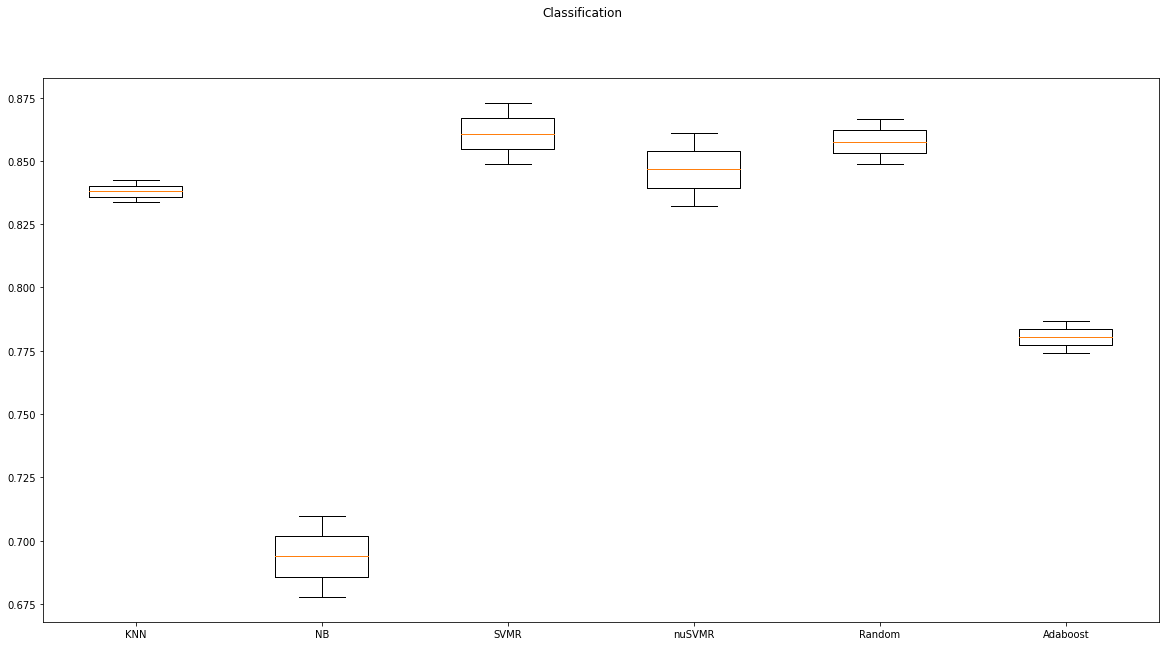

In [0]:
from statsmodels.stats import weightstats as stests
from sklearn.svm import LinearSVC
from sklearn.svm import SVC,NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('NB', GaussianNB()))
models.append(('SVMR', SVC(kernel='rbf',gamma=0.01,C=5)))
models.append(('nuSVMR', NuSVC(kernel='rbf',gamma=0.01)))
models.append(('Random', RandomForestClassifier(n_estimators=130)))

results=[]
names=[]
for name, model in models:
    #kfold = model_selection.KFold(n_splits=5, shuffle=True)
    res = model_selection.cross_val_score(model, X, Y,cv=2, scoring='accuracy')
    results.append(res)
    names.append(name)

fig = plt.figure()                  
fig.suptitle('Classification')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

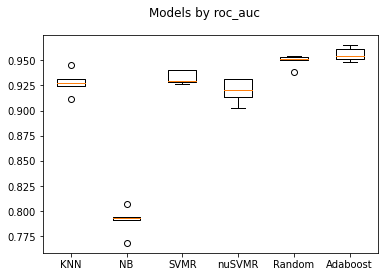

In [0]:
from statsmodels.stats import weightstats as stests
from sklearn.svm import LinearSVC
from sklearn.svm import SVC,NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('NB', GaussianNB()))
models.append(('SVMR', SVC(kernel='rbf',gamma=0.01,C=5)))
models.append(('nuSVMR', NuSVC(kernel='rbf',gamma=0.01)))
models.append(('Random', RandomForestClassifier(n_estimators=130)))
rfc = RandomForestClassifier(n_estimators=100)
models.append(("Adaboost",AdaBoostClassifier(base_estimator=rfc,n_estimators=rfc.n_estimators)))

results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True)
    res = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
    results.append(res)
    names.append(name)

fig = plt.figure()                  
fig.suptitle('Models by roc_auc')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

**KNN model**

---



---



In [0]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
Y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[205  37]
 [ 26 242]]
              precision    recall  f1-score   support

          -1       0.89      0.85      0.87       242
           1       0.87      0.90      0.88       268

    accuracy                           0.88       510
   macro avg       0.88      0.88      0.88       510
weighted avg       0.88      0.88      0.88       510



In [0]:
##save in file
Pred_result=(classifier.predict(Test_seq))
IDs=df2['ID'].values.tolist()


In [0]:
import csv
with open('result.csv','w',newline='') as f:
  thewriter=csv.writer(f)
  thewriter.writerow(['ID','Label'])
  for i in range(0,len(Pred_result)):
    thewriter.writerow([IDs[i],Pred_result[i]])

In [0]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train , y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
#by gridsearch parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

grid = GridSearchCV(KNeighborsClassifier, param_grid, cv=3, scoring='roc_auc')
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

TypeError: ignored

**SVMR model**

---



---



In [0]:
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)
classifier=SVC(kernel='rbf',C=15)
classifier.fit(X ,Y)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[249  13]
 [  7 241]]
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       262
           1       0.95      0.97      0.96       248

    accuracy                           0.96       510
   macro avg       0.96      0.96      0.96       510
weighted avg       0.96      0.96      0.96       510



In [0]:
##save in file
Pred_result=(classifier.predict(X_test))
IDs=df2['ID'].values.tolist()
print(len(IDs)," ",len(Pred_result))
import csv
with open('result.csv','w',newline='') as f:
  thewriter=csv.writer(f)
  thewriter.writerow(['ID','Label'])
  for i in range(0,len(Pred_result)):
    thewriter.writerow([IDs[i],Pred_result[i]])

368   368


In [0]:
from sklearn import model_selection
from sklearn.svm import SVC

results=[]
names=[]
kfold = model_selection.KFold(n_splits=5, shuffle=True)
res = model_selection.cross_val_score(SVC(kernel='rbf', gamma='scale'), X, Y_train, cv=kfold, scoring='roc_auc')

print(res)

[0.92821706 0.90127923 0.91928761 0.9046203  0.91417147]


In [0]:
#by gridsearch parameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01,0.5,1,5,10,10,15,20,50,100],  
              'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv = 3, scoring='roc_auc')
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.934805997693195
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


**Adaboost**

---



---



In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier=AdaBoostClassifier(DecisionTreeClassifier(random_state = 11,max_features = "auto",max_depth = 1),
    n_estimators=10)

classifier.fit(x_train,y_train)

Y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[170  92]
 [ 71 177]]
              precision    recall  f1-score   support

          -1       0.71      0.65      0.68       262
           1       0.66      0.71      0.68       248

    accuracy                           0.68       510
   macro avg       0.68      0.68      0.68       510
weighted avg       0.68      0.68      0.68       510



In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [1,10,30,50,70,100,130,150,170,200,230,250]}

ABC = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100))

grid = GridSearchCV(ABC, param_grid, scoring='roc_auc')

grid.fit(X,Y)

print(grid.best_score_)
print(grid.best_params_)

KeyboardInterrupt: ignored

**xgboost**

---



---



**Random forest**

---



---



In [0]:
classifier=RandomForestClassifier(n_estimators=100,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)
classifier.fit(x_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[219  39]
 [ 28 224]]
              precision    recall  f1-score   support

          -1       0.89      0.85      0.87       258
           1       0.85      0.89      0.87       252

    accuracy                           0.87       510
   macro avg       0.87      0.87      0.87       510
weighted avg       0.87      0.87      0.87       510



In [0]:
#!apt-get -qq install python-cartopy python3-scikitplot
#!apt-get -qq install -y libarchive-dev && pip install -q -U scikitplot
!pip install -q scikitplot
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, Y_pred)
plt.show()

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


ModuleNotFoundError: ignored

In [0]:
##save in file
Pred_result=(classifier.predict(X_test))
IDs=df2['ID'].values.tolist()
print(len(IDs)," ",len(Pred_result))
import csv
with open('result.csv','w',newline='') as f:
  thewriter=csv.writer(f)
  thewriter.writerow(['ID','Label'])
  for i in range(0,len(Pred_result)):
    thewriter.writerow([IDs[i],Pred_result[i]])

368   368


In [0]:
#Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [1,10,30,50,70,100,130,150,170,200,230,250]}
  
grid = GridSearchCV(RandomForestClassifier, param_grid, refit = True, cv = 3, scoring='accuracy')

grid.fit(X,Y)

print(grid.best_score_)
print(grid.best_params_)

**grid search**

---



---



In [0]:
#Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'kernels':['rbf'], 
              'gamma':[0.0001,0.001,0.01,0.1,1,10,100],
              'C':list(range(1,16))}

grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

In [0]:
gamma_range=list(range(1,15))
print(gamma_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]




**Model using 3 data**

---



---



In [0]:
Train_seq.shape
frequency_matrix.shape
PCA_data.shape
Y_train.shape

(2550,)

In [0]:
x1_train,x1_test=Train_seq.iloc[0:2000],Train_seq.iloc[2000:]
x2_train,x2_test=frequency_matrix.iloc[0:2000],frequency_matrix.iloc[2000:]
x3_train,x3_test=PCA_data.iloc[0:2000],PCA_data.iloc[2000:]
y_train,y_test=Y_train.iloc[0:2000],Y_train.iloc[2000:]

In [0]:
from sklearn.svm import SVC

classifier1=SVC(kernel='rbf',gamma=0.01,C=20)
classifier2=SVC(kernel='rbf',gamma=0.01,C=15)
classifier3=SVC(kernel='rbf',gamma=0.1,C=1)
classifier1.fit(x1_train ,y_train)
classifier2.fit(x2_train ,y_train)
classifier3.fit(x3_train ,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred=classifier1.predict(x1_test)
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))
print()

Y_pred=classifier2.predict(x2_test)
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))
print()

Y_pred=classifier3.predict(x3_test)
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))
print()

[[255  22]
 [ 42 231]]
              precision    recall  f1-score   support

          -1       0.86      0.92      0.89       277
           1       0.91      0.85      0.88       273

    accuracy                           0.88       550
   macro avg       0.89      0.88      0.88       550
weighted avg       0.89      0.88      0.88       550


[[232  45]
 [ 32 241]]
              precision    recall  f1-score   support

          -1       0.88      0.84      0.86       277
           1       0.84      0.88      0.86       273

    accuracy                           0.86       550
   macro avg       0.86      0.86      0.86       550
weighted avg       0.86      0.86      0.86       550


[[214  63]
 [ 47 226]]
              precision    recall  f1-score   support

          -1       0.82      0.77      0.80       277
           1       0.78      0.83      0.80       273

    accuracy                           0.80       550
   macro avg       0.80      0.80      0.80       550
wei

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01,0.5,1,5,10,10,15,20],  
              'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv = 3, scoring='accuracy')
grid.fit(frequency_matrix, Y_train)

print(grid.best_score_)
print(grid.best_params_)

0.8603921568627451
{'C': 15, 'gamma': 0.01, 'kernel': 'rbf'}


In [0]:
frequency_matrix_test=frequency_matrix_test.drop(columns=[0],axis=1)

In [0]:
Predict_results=[]
Predict_results.append(classifier1.predict(Test_seq))
Predict_results.append(classifier2.predict(frequency_matrix_test))
Predict_results.append(classifier3.predict(PCA_data_test))
Predict_results=pd.DataFrame(Predict_results)

In [0]:
Final=[]
for i in range(0,368):
  if sum(Predict_results.iloc[:,i])>0:
    Final.append(1)
  else:
    Final.append(-1)

In [0]:
##save in file
IDs=df2['ID'].values.tolist()
import csv
with open('result.csv','w',newline='') as f:
  thewriter=csv.writer(f)
  thewriter.writerow(['ID','Label'])
  for i in range(0,len(Final)):
    thewriter.writerow([IDs[i],Final[i]])

In [0]:
Predict_results.shape

(3, 368)

Base AUC = 0.5
RF with AdaBoost AUC = 0.9378246664479442


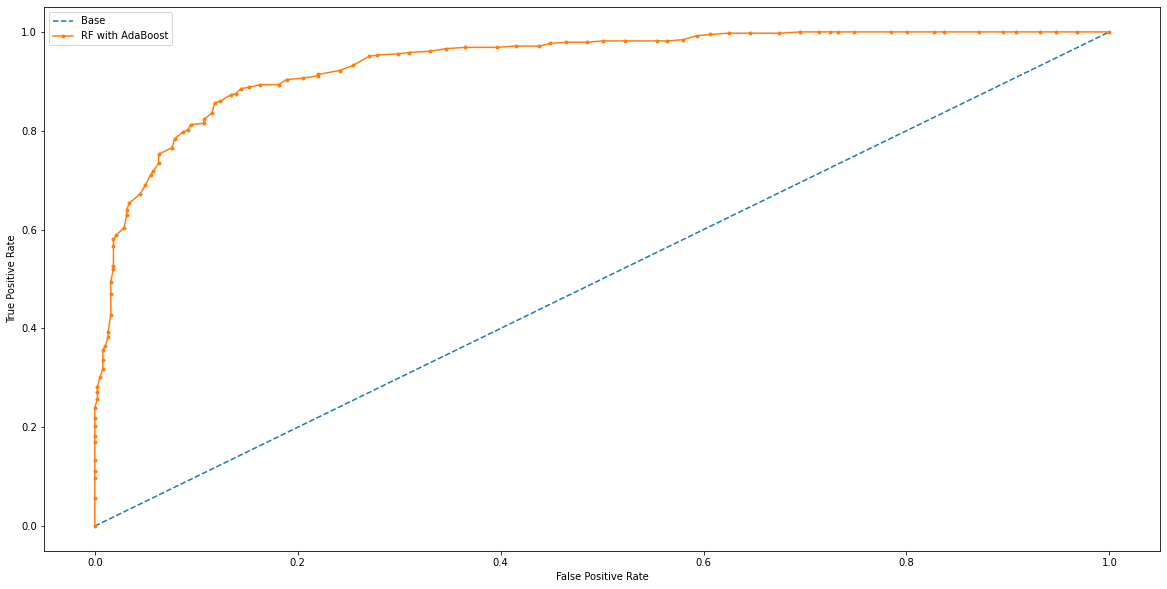

0.869281045751634


In [0]:
#Header files
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



#importing file from computer as pandas dataframe
Train_rawdata = pd.read_csv(r'https://raw.githubusercontent.com/Chokerino/IQB/master/train.csv')
Test_rawdata = pd.read_csv(r'https://raw.githubusercontent.com/Chokerino/IQB/master/test.csv') 


#Correction required at 1481th row as label of the row was not a valid number
Train_rawdata.at[1481,'Lable']=1


#Assigning sequence and its label from csv file
X = Train_rawdata['Sequence']
Y = Train_rawdata['Lable'].astype('int')


#To calculate frequency matrix
features_list = {'A':0, 'C':1, 'D':2, 'E':3, 'F':4, 'G':5, 'H':6, 'I':7, 'K':8, 'L':9, 'M':10, 'N':11, 'P':12, 'Q':13, 'R':14, 'S':15, 'T':16, 'V':17, 'W':18, 'Y':19}
to_df=[]
for i in range(X.shape[0]):
    seq = X.iloc[i]
    enc = [0]*20
    for j in seq:
        enc[features_list[j]]+=1
    to_df.append(enc)


#As our training of model will done with frequency matrice
X = pd.DataFrame(to_df, columns = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])


#Spliting data into training and testing purpose
#We have taken 70% data for training and 30% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, shuffle=True)

base_probs = [0 for i in range(len(Y_test))]

#Fitting data into model
rfc = RandomForestClassifier(n_estimators=100)
model = AdaBoostClassifier(base_estimator=rfc,n_estimators=rfc.n_estimators)
model.fit(X_train,Y_train)

#Here we calculate accuracy and roc of model
model_probs = model.predict_proba(X_test)[:,1]
base_auc = roc_auc_score(Y_test, base_probs)
model_auc = roc_auc_score(Y_test, model_probs)

#roc score
print('Base AUC = {}'.format(base_auc))
print('RF with AdaBoost AUC = {}'.format(model_auc))
#accuracy score
Y_pred = model.predict(X_test)
print("Accuracy of model on test data is : ",accuracy_score(Y_pred, Y_test))


#Plot roc on graph
base_fpr, base_tpr, _ = roc_curve(Y_test, base_probs)
model_fpr, model_tpr, _ = roc_curve(Y_test, model_probs)

plt.plot(base_fpr, base_tpr, linestyle='--', label='Base')
plt.plot(model_fpr, model_tpr, marker='.', label='RF with AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



#saving result from the model in csv file format
##save in file

X=Test_rawdata['Sequence']

to_df=[]
for i in range(X.shape[0]):
    seq = X.iloc[i]
    enc = [0]*20
    for j in seq:
        enc[features_list[j]]+=1
    to_df.append(enc)
X = pd.DataFrame(to_df, columns = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])


Pred_result=(model.predict(X))
IDs=Test_rawdata['ID'].values.tolist()
import csv
with open('result.csv','w',newline='') as f:
  thewriter=csv.writer(f)
  thewriter.writerow(['ID','Label'])
  for i in range(0,len(Pred_result)):
    thewriter.writerow([IDs[i],Pred_result[i]])


In [0]:
#saving result from the model in csv file format
##save in file

X=Test_rawdata['Sequence']

to_df=[]
for i in range(X.shape[0]):
    seq = X.iloc[i]
    enc = [0]*20
    for j in seq:
        enc[features_list[j]]+=1
    to_df.append(enc)
X = pd.DataFrame(to_df, columns = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])


Pred_result=(model.predict(X))
IDs=Test_rawdata['ID'].values.tolist()
import csv
with open('result.csv','w',newline='') as f:
  thewriter=csv.writer(f)
  thewriter.writerow(['ID','Label'])
  for i in range(0,len(Pred_result)):
    thewriter.writerow([IDs[i],Pred_result[i]])